In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D, Flatten, MaxPooling2D, Dropout,Activation,MaxPool2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [0]:
(X_Train,Y_Train),(X_Test,Y_Test) = mnist.load_data()

In [0]:
X_Train = (X_Train/255.0) 
X_Test  = (X_Test/255.0) 

In [0]:
X_Train.shape

(60000, 28, 28)

In [0]:
X_Test.shape

(10000, 28, 28)

In [0]:
X_Train[10]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [0]:
Y_Train[10]

3

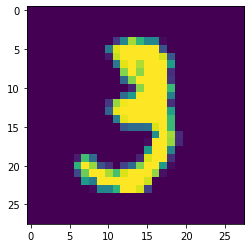

In [0]:
plt.imshow(X_Train[10])

In [0]:
X_Train = X_Train.reshape(60000,28,28,1)
X_Test  = X_Test.reshape(10000,28,28,1)

In [0]:
#1-Hot Encoding

y_train_oneh = to_categorical(Y_Train)
y_test_oneh  = to_categorical(Y_Test)

print(y_train_oneh[10]) 

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [0]:
model=Sequential()
model.add(Conv2D(10,kernel_size=5,activation='relu',padding='same',input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(8,kernel_size=5,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(10,kernel_size=5,activation='relu',padding='same',input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(8,kernel_size=5,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(10,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 10)        260       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 10)        40        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 8)         2008      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 8)         0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 10)        2010      
_________________________________________________________________
batch_normalization_1 (Batch (None, 12, 12, 10)        4

In [0]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
history = model.fit(X_Train,y_train_oneh, validation_data=(X_Test,y_test_oneh),epochs=50,batch_size=64)

Epoch 1/50
938/938 [==============================] - 5s 6ms/step - loss: 1.1193 - accuracy: 0.6139 - val_loss: 0.1969 - val_accuracy: 0.9526
Epoch 2/50
938/938 [==============================] - 5s 5ms/step - loss: 0.4598 - accuracy: 0.8425 - val_loss: 0.1072 - val_accuracy: 0.9778
Epoch 3/50
938/938 [==============================] - 5s 5ms/step - loss: 0.3598 - accuracy: 0.8827 - val_loss: 0.0839 - val_accuracy: 0.9792
Epoch 4/50
938/938 [==============================] - 5s 5ms/step - loss: 0.3061 - accuracy: 0.9042 - val_loss: 0.0679 - val_accuracy: 0.9833
Epoch 5/50
938/938 [==============================] - 5s 5ms/step - loss: 0.2457 - accuracy: 0.9277 - val_loss: 0.0578 - val_accuracy: 0.9848
Epoch 6/50
938/938 [==============================] - 5s 5ms/step - loss: 0.2287 - accuracy: 0.9347 - val_loss: 0.0472 - val_accuracy: 0.9871
Epoch 7/50
938/938 [==============================] - 5s 5ms/step - loss: 0.2136 - accuracy: 0.9394 - val_loss: 0.0403 - val_accuracy: 0.9892
Epoch 

**Achieved an accuracy of around ~99.4%**

In [0]:
# Comparing with some data from the training set

predictions = model.predict(X_Test[100:110])
print(np.argmax(predictions,axis=1))

print(Y_Test[100:110])

[6 0 5 4 9 9 2 1 9 4]
[6 0 5 4 9 9 2 1 9 4]


In [0]:
for i in range(0,10):
  image = np.array(X_Test[i],dtype='float')
  image_reshaped = image.reshape((28,28))
  plt.imshow(image_reshaped,cmap='gray')
  plt.show()